In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

df = pd.read_csv('./BMW_Car_Sales.csv')
print(df.head())

# Checking for missing values
print(df.isnull().sum())

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmissio

In [28]:
print(df.shape)

(50000, 11)


In [29]:
print(df.info)

<bound method DataFrame.info of           Model  Year         Region   Color Fuel_Type Transmission  \
0      5 Series  2016           Asia     Red    Petrol       Manual   
1            i8  2013  North America     Red    Hybrid    Automatic   
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
4      7 Series  2020  South America   Black    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49995        i3  2014           Asia     Red    Hybrid       Manual   
49996        i3  2023    Middle East  Silver  Electric       Manual   
49997  5 Series  2010    Middle East     Red    Petrol    Automatic   
49998        i3  2020           Asia   White  Electric    Automatic   
49999        X1  2020  North America    Blue    Diesel       Manual   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0                3.5      151748  

In [30]:
print(df.columns)

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')


In [32]:
print(df.duplicated().sum())

0


In [14]:
# The first 5 rows of the "model" and "region" columns
print(df[["Model", "Region"]].head())

      Model         Region
0  5 Series           Asia
1        i8  North America
2  5 Series  North America
3        X3    Middle East
4  7 Series  South America


In [15]:
# Top 5 best-selling models
top_models = df['Model'].value_counts().head(5)
print(top_models)

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
Name: count, dtype: int64


In [34]:
# Sorting for price
sort_price = df.sort_values(by = "Price_USD", ascending = False)
print(sort_price)

          Model  Year       Region   Color Fuel_Type Transmission  \
26071        i8  2010  Middle East  Silver  Electric       Manual   
38158        X6  2019         Asia     Red  Electric    Automatic   
6862         i8  2024       Africa  Silver    Diesel    Automatic   
154          X1  2016       Africa    Grey    Petrol       Manual   
6271   3 Series  2019  Middle East   White    Hybrid       Manual   
...         ...   ...          ...     ...       ...          ...   
3264   3 Series  2021  Middle East     Red    Hybrid       Manual   
13439        M5  2018         Asia   Black    Hybrid       Manual   
26405  5 Series  2015       Africa   White    Hybrid       Manual   
19031        X5  2022         Asia    Blue    Diesel       Manual   
3762         i8  2013         Asia    Grey  Electric    Automatic   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
26071            4.2      115320     119998          5842                  Low  
38158    

In [16]:
# Average price by year
avg = df.groupby("Year")["Price_USD"].mean()
print(avg)

Year
2010    75072.215916
2011    75293.276388
2012    75019.567227
2013    74535.908298
2014    74556.535224
2015    74049.552710
2016    75543.540862
2017    75173.147416
2018    75455.480781
2019    75194.426002
2020    75057.667083
2021    75399.277580
2022    74967.875503
2023    75194.004660
2024    75025.852933
Name: Price_USD, dtype: float64


In [17]:
# Average price by model
avg = df.groupby("Model")["Price_USD"].mean()
print(avg)

Model
3 Series    75566.233950
5 Series    75287.844077
7 Series    75570.196742
M3          74841.588715
M5          74474.930996
X1          75262.219037
X3          75016.616856
X5          74708.116782
X6          74434.600491
i3          74800.268081
i8          75366.270951
Name: Price_USD, dtype: float64


      Price_USD
Year           
2010  249990479
2011  246811360
2012  249965198
2013  247906431
2014  249764393
2015  248658398
2016  254204015
2017  247319655
2018  247343066
2019  255059493
2020  240559823
2021  254246364
2022  260738271
2023  242049501
2024  257113598


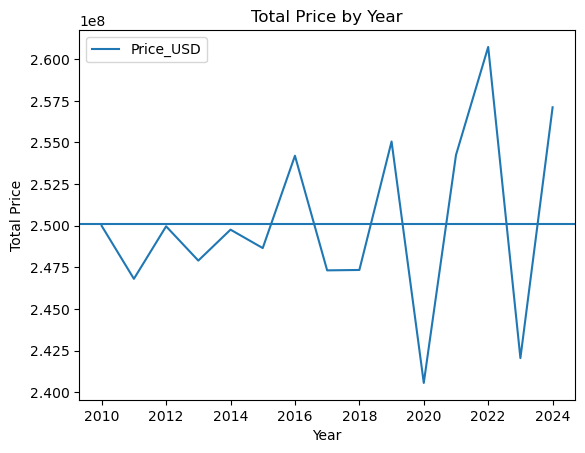

In [67]:
# Total price chart by year
sum = df.groupby("Year").agg({
    "Price_USD": "sum"
})
print(sum)
sum.plot (kind = "line")
plt.xlabel("Year")
plt.ylabel("Total Price")
plt.title("Total Price by Year")
plt.axhline(y=np.nanmean(sum["Price_USD"]))
plt.show()


In [18]:
# Number of models priced over 15,000 USD
print(df[df["Price_USD"] > 15.000].shape[0])

50000


In [68]:
# Find how many distinct models are in the “Model” column. Print the number of occurrences for each model.
print("Different Model:", df["Model"].nunique())
print("Models:\n", df["Model"].value_counts())

Different Model: 11
Models:
 Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


In [20]:
# Using pivot_table, display both the average Price_USD and Sales_Volume values for each year type.
pivot_table = df.pivot_table(
    values=["Price_USD", "Sales_Volume"],
    index="Year",
    aggfunc="mean"
)
print(pivot_table)

         Price_USD  Sales_Volume
Year                            
2010  75072.215916   5085.118619
2011  75293.276388   5112.550641
2012  75019.567227   5027.579532
2013  74535.908298   5071.176488
2014  74556.535224   5062.376119
2015  74049.552710   5065.576831
2016  75543.540862   5039.390788
2017  75173.147416   5051.918237
2018  75455.480781   5006.794692
2019  75194.426002   5068.383255
2020  75057.667083   5089.186583
2021  75399.277580   5007.314947
2022  74967.875503   5152.658424
2023  75194.004660   5053.946567
2024  75025.852933   5114.634958
